In [1]:
import pandas as pd
loc_data = pd.read_csv('restaurant_address.csv', names= ['id','lattitude','longitude'], header=None)

In [2]:
loc_data.head()

,id,lattitude,longitude
0,19089531,22.471749,88.381998
1,18950586,22.486096,88.315018
2,19110775,22.946735,88.449517
3,25386,22.569356,88.433534
4,24874,22.542298,88.361313


In [3]:
loc_data.lattitude.describe()

count    6212.000000
mean       22.544455
std         0.765759
min         0.000000
25%        22.516608
50%        22.563204
75%        22.598953
max        29.210421
Name: lattitude, dtype: float64

In [4]:
loc_data.longitude.describe()

count    6212.000000
mean       88.277903
std         2.968039
min         0.000000
25%        88.352295
50%        88.369450
75%        88.406335
max        88.534928
Name: longitude, dtype: float64

In [5]:
loc_data = loc_data.loc[loc_data.longitude !=0.0,:]

In [6]:
loc_data.lattitude.describe()

count    6205.000000
mean       22.569888
std         0.113746
min        22.195970
25%        22.516714
50%        22.563230
75%        22.599012
max        29.210421
Name: lattitude, dtype: float64

In [7]:
loc_data.longitude.describe()

count    6205.000000
mean       88.377492
std         0.128119
min        78.961830
25%        88.352341
50%        88.369499
75%        88.406415
max        88.534928
Name: longitude, dtype: float64

In [8]:
ll_data = loc_data.drop(['id'],axis=1)

In [9]:
ll_data

,lattitude,longitude
0,22.471749,88.381998
1,22.486096,88.315018
2,22.946735,88.449517
3,22.569356,88.433534
4,22.542298,88.361313
...,...,...
6207,22.555918,88.359127
6208,22.619984,88.348676
6209,22.976149,88.433251
6210,22.723073,88.346931


In [10]:
ll_data['count'] = ll_data.groupby(['lattitude','longitude'])['lattitude'].transform('count')

In [31]:
from folium.plugins import HeatMap
import folium
gmap = folium.Map(location=[22.569888,88.377492],control_scale=True, zoom_start=12)
HeatMap(ll_data.values.tolist(),zoom=20,radius=15).add_to(gmap)

In [32]:
gmap

In [17]:
import pandas as pd
rest_info = pd.read_csv('~path/restaurant_info_kolkata.csv',  usecols = ['Restaurant ID',  'Cuisine'])

In [18]:
rest_info

,Restaurant ID,Cuisine
0,19089531,"North Indian, Chinese, Continental"
1,18950586,"Lebanese, Middle Eastern, Healthy Food"
2,19110775,"North Indian, Chinese, Mughlai"
3,25386,Fast Food
4,24874,"Cafe, Desserts"
...,...,...
7921,21847,Chinese
7922,18575984,"North Indian, Chinese"
7923,19008573,North Indian
7924,19104817,"Chinese, North Indian, Mughlai"


In [19]:
rest_info =  rest_info.join(loc_data.set_index('id'), on='Restaurant ID').dropna().reset_index(drop=True)

In [20]:
rest_info

,Restaurant ID,Cuisine,lattitude,longitude
0,19089531,"North Indian, Chinese, Continental",22.471749,88.381998
1,18950586,"Lebanese, Middle Eastern, Healthy Food",22.486096,88.315018
2,19110775,"North Indian, Chinese, Mughlai",22.946735,88.449517
3,25386,Fast Food,22.569356,88.433534
4,24874,"Cafe, Desserts",22.542298,88.361313
...,...,...,...,...
6225,19100290,Ice Cream,22.555918,88.359127
6226,18537307,"South Indian, Chinese, North Indian, Mishti",22.619984,88.348676
6227,19089835,"North Indian, Chinese",22.976149,88.433251
6228,18950790,"North Indian, Chinese",22.723073,88.346931


Text(0.5, 1.0, 'Most popular cuisines of Kolkata')

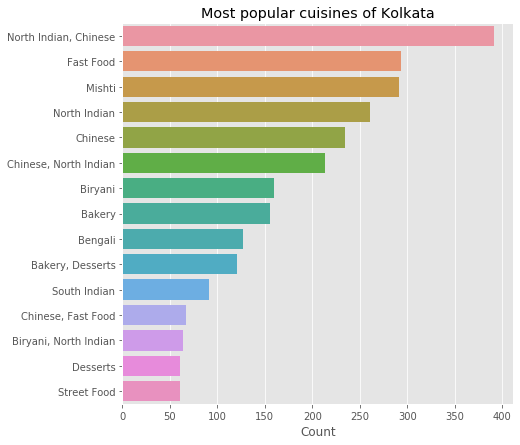

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(7,7))
cuisines=rest_info['Cuisine'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Kolkata")

In [22]:
rest_info.loc[rest_info.Cuisine == 'Chinese, North Indian',:'Cuisine']= 'North Indian, Chinese'

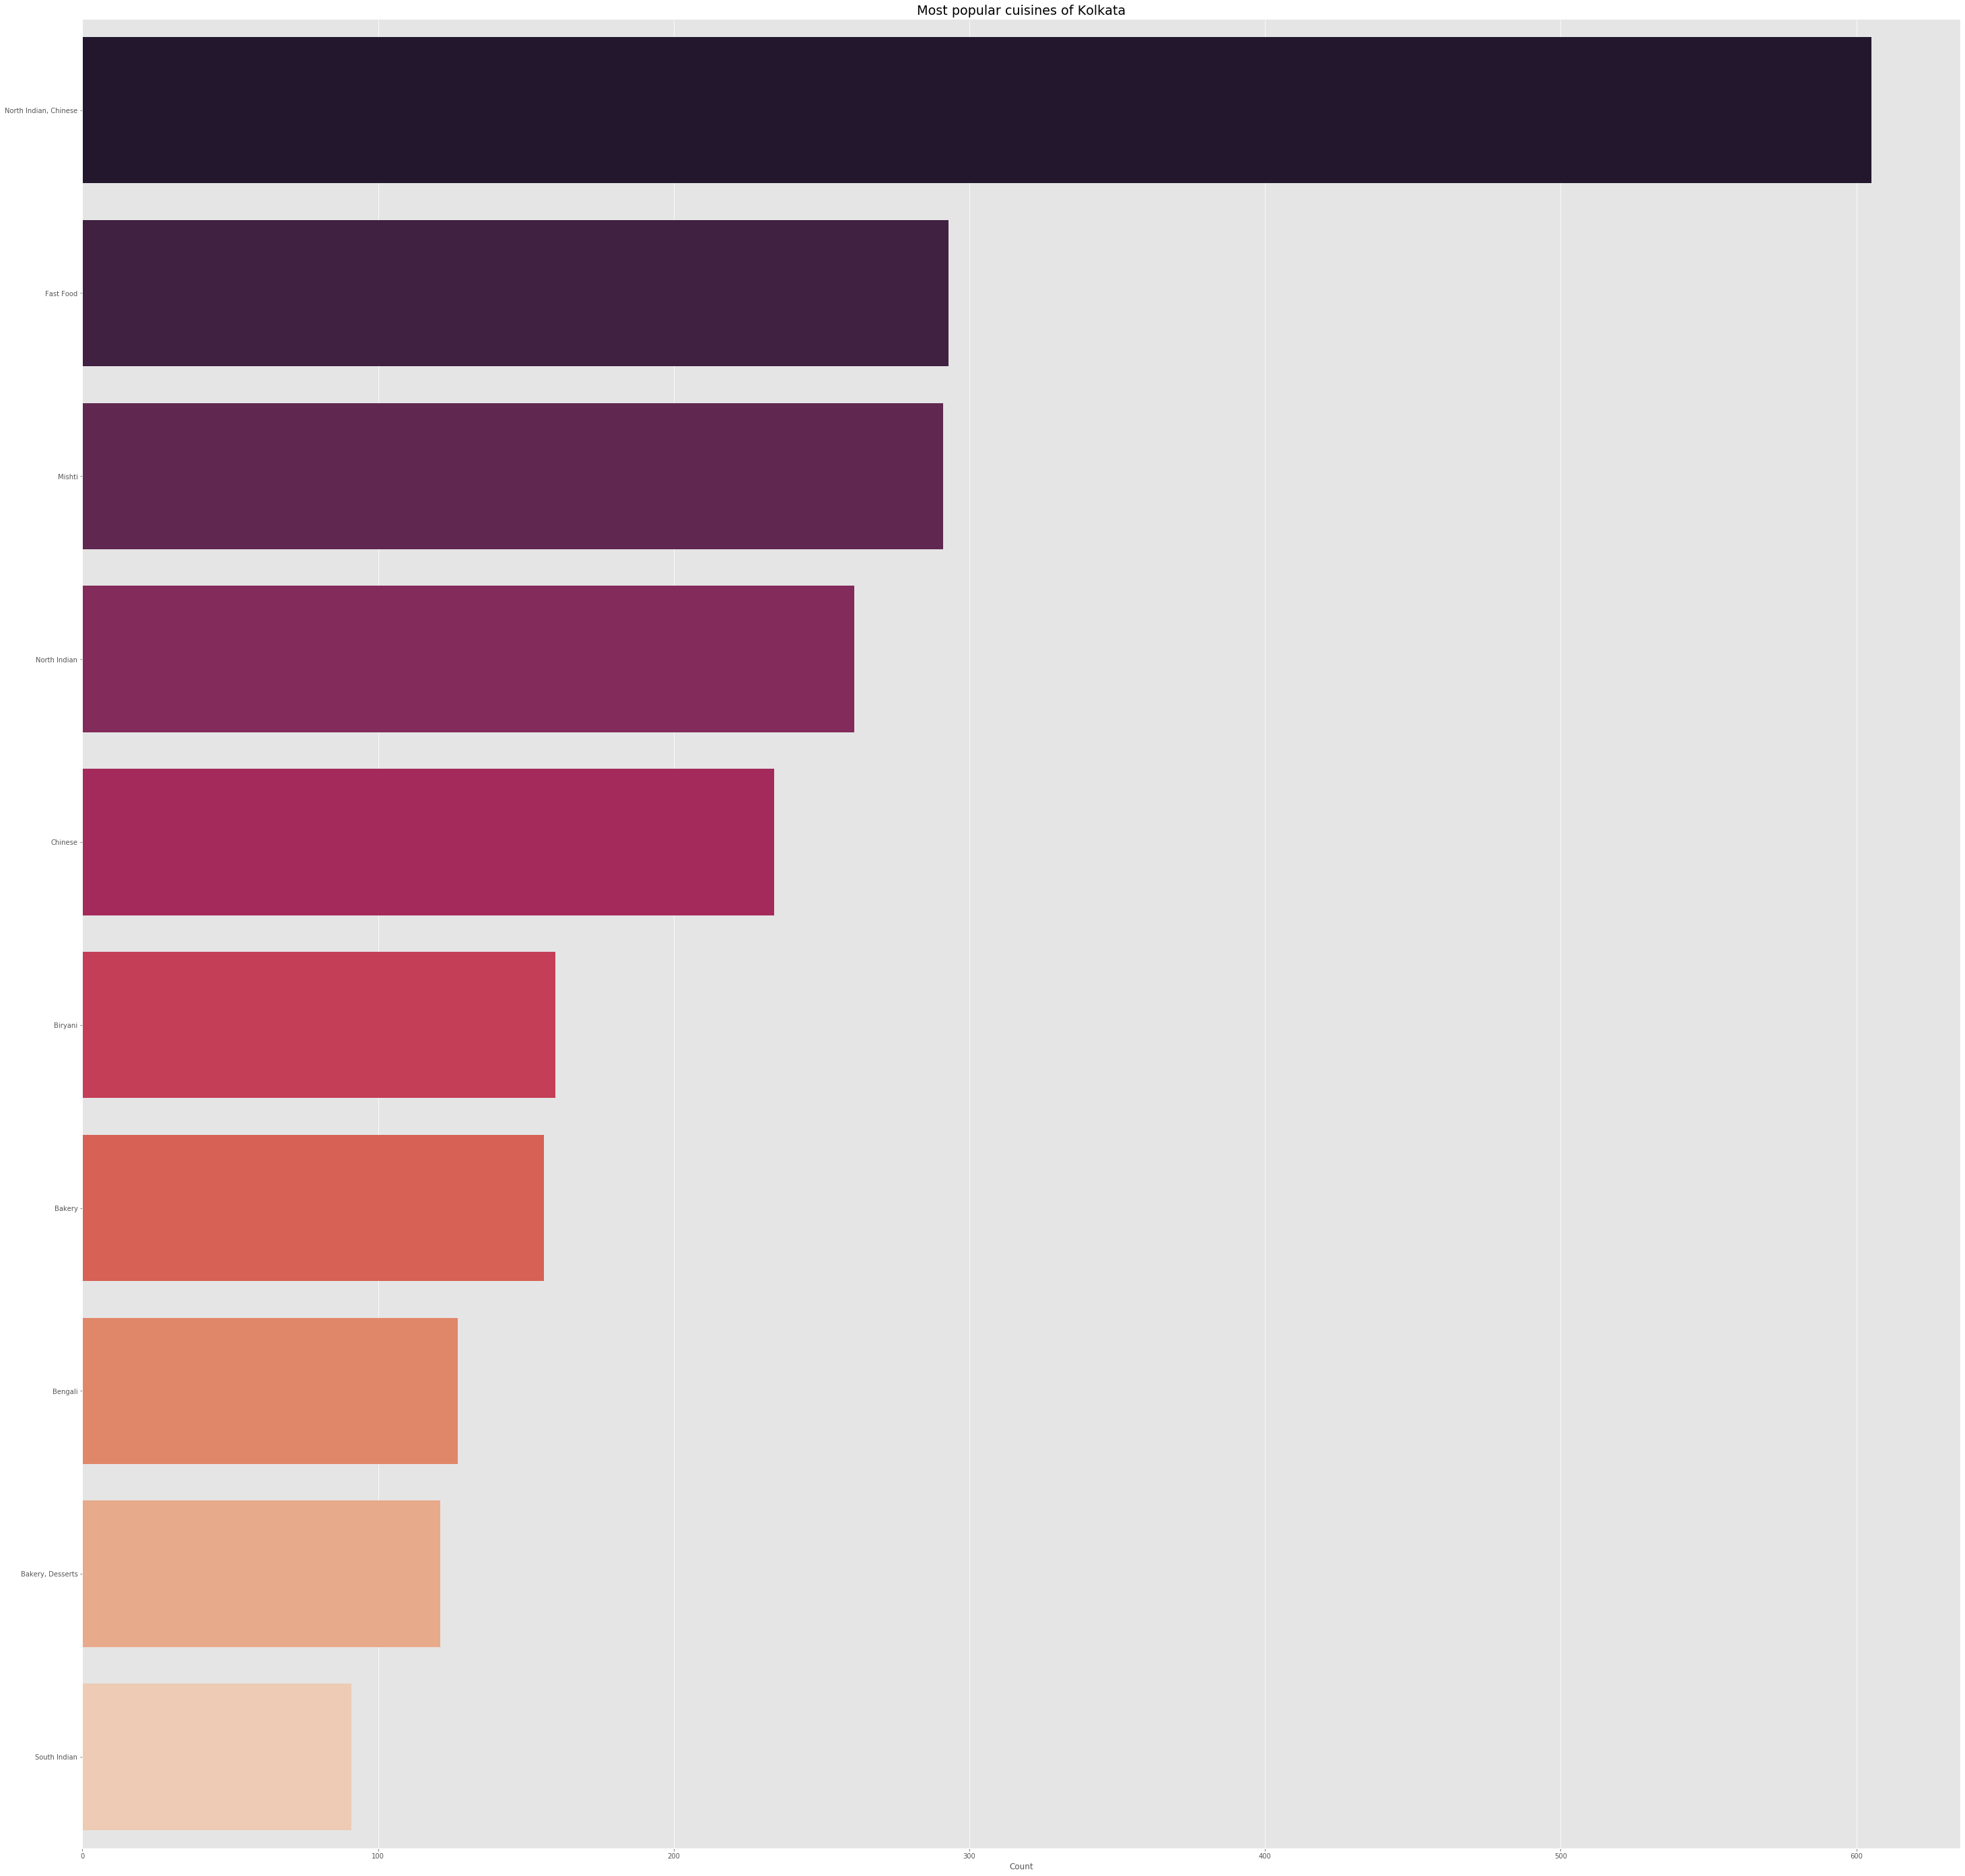

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(50,50))
cuisines=rest_info['Cuisine'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index,palette="rocket")
sns.set_context("paper", font_scale=2)
plt.xlabel('Count')
plt.title("Most popular cuisines of Kolkata")
plt.savefig(fname = '~path/cuisines.png')

In [24]:
data=rest_info.groupby(['lattitude','longitude','Cuisine']).agg('count').sort_values(['Restaurant ID'],ascending=False).groupby(['lattitude','longitude'], as_index=False).apply(lambda x : x.sort_values(by="Restaurant ID",ascending=False).head(3))['Restaurant ID'].reset_index().rename(columns={'Restaurant ID':'count'})

In [25]:
data

,level_0,lattitude,longitude,Cuisine,count
0,0,22.195970,88.169749,"North Indian, Continental",2
1,0,22.195970,88.169749,Finger Food,1
2,0,22.195970,88.169749,North Indian,1
3,1,22.363068,88.430720,Cafe,1
4,2,22.423552,88.409635,"North Indian, Chinese",1
...,...,...,...,...,...
6184,6153,22.980429,88.438133,Mishti,1
6185,6154,22.981670,88.439166,"Fast Food, Bengali",1
6186,6155,22.982625,88.433560,"Chinese, Fast Food",1
6187,6156,22.982805,88.432968,Mishti,1


In [26]:
def produce_data(col,name):
    table = data.loc[data.loc[:,col] == name,:]
    return table.loc[:,['lattitude','longitude','count']]

In [27]:
North_India=produce_data('Cuisine','North Indian, Chinese')

In [28]:
North_India

,lattitude,longitude,count
4,22.423552,88.409635,1
14,22.439671,88.396912,1
32,22.446151,88.399785,1
34,22.446512,88.397361,1
45,22.450160,88.302510,1
...,...,...,...
6164,22.974445,88.486211,1
6168,22.976149,88.433251,1
6170,22.977444,88.446743,1
6175,22.978776,88.435712,1


In [33]:
from folium.plugins import HeatMap
import folium
gmap = folium.Map(location=[22.569888,88.377492], control_scale=True, zoom_start=12)
HeatMap(North_India.values.tolist(),zoom=20,radius=15).add_to(gmap)

In [34]:
gmap

In [43]:
Fast_food=produce_data('Cuisine','Fast Food')

In [44]:
Fast_food

,lattitude,longitude,count
39,22.447397,88.392341,1
51,22.452629,88.303134,1
132,22.466323,88.404671,1
159,22.468041,88.107895,1
175,22.469117,88.372108,1
...,...,...,...
6022,22.750365,88.342266,1
6036,22.753429,88.340568,1
6048,22.754250,88.340464,1
6078,22.760372,88.370309,1


In [45]:
from folium.plugins import HeatMap
import folium
gmap = folium.Map(location=[22.569888,88.377492], control_scale=True, zoom_start=12)
HeatMap(Fast_food.values.tolist(),zoom=20,radius=15).add_to(gmap)

In [46]:
gmap